# Notebook for background fitting example

In [1]:
# %load_ext autoreload
# %autoreload 2
import os
import pandas as pd
import numpy as np
from granulation_fitting import granulation_fit 
rcParams['font.size'] = 18

/home/nielsemb/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
download_dir = '/home/nielsemb/work/mounts/Bluebear_data/data'

workDir = '/home/nielsemb/work/repos/granulation'

prior_data_fname = os.path.join(*[workDir, 'bkgfit_output_nopca.csv']) 
prior_data = pd.read_csv(prior_data_fname)

KIC10000108
Using cached search result.
Loading fits files from cache.


3088it [01:19, 38.96it/s, +200 | bound: 81 | nc: 1 | ncall: 32979 | eff(%): 10.031 | loglstar:   -inf < -222164.900 <    inf | logz: -222178.749 +/-  0.246 | dlogz:  0.001 >  0.209]


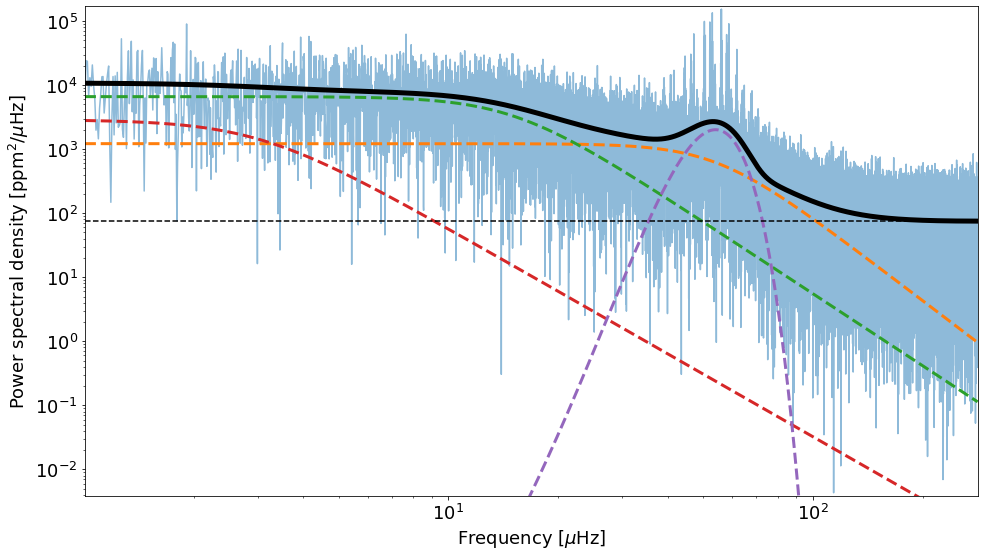

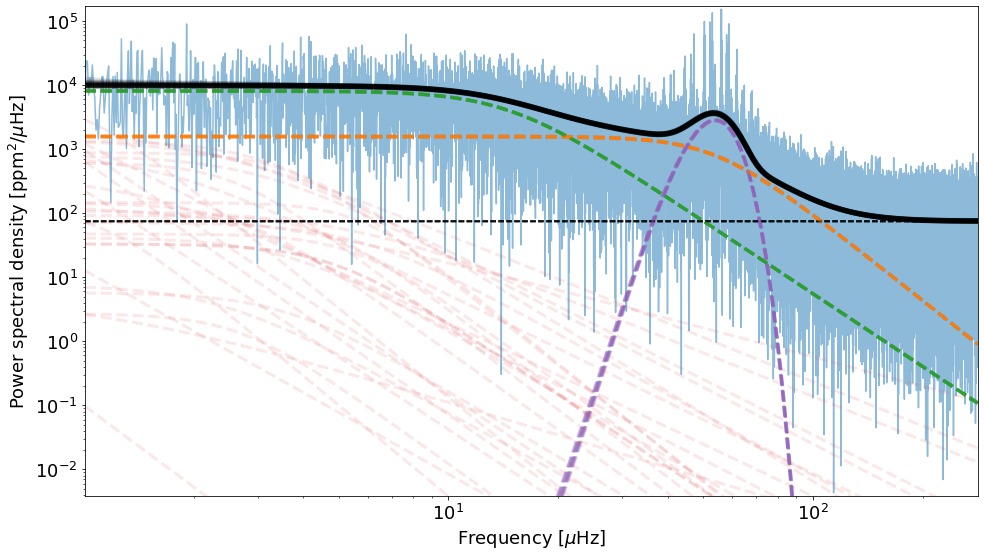

In [3]:
i = 0  

ID = prior_data.loc[i, 'ID']
print(ID)

outputDir = os.path.join(*[workDir, 'results', ID])

if not os.path.exists(outputDir):
    os.makedirs(outputDir)

_numax = prior_data.loc[i, 'numax'] # tgt numax

numax = [10**_numax, 0.05*10**_numax] # The error is only used to select nearby tgts in the prior

gfit = granulation_fit(ID, numax, download_dir, pcadim=2, N=200, fname=prior_data_fname)

figP, axP = subplots(figsize=(16,9))
gfit.plotModel(figP, axP, outputDir=outputDir); # Plot model from median of the prior

dynSampler, dynSamples = gfit.runDynesty(progress=True)

gfit.storeResults(outputDir) # Store the results

figM, axM = subplots(figsize=(16,9))
gfit.plotModel(figM, axM, dynSamples, outputDir=outputDir); # Plot model based on posterior samples

In [ ]:
# Pick some targets from various parts of the numax range.
test_numaxs = np.linspace(min(prior_data['numax']), max(prior_data['numax']), 10)
idxs = np.array([np.argmin(abs(prior_data['numax'].values - nu)) for nu in test_numaxs])

# Optional weighting function to plug in, use weights_args dict to set parameters
def wfunc(self, n=1):
     
    ppf, pdf = self.getQuantileFuncs(self.data_F[:, :1])

    w = 1/pdf[0](self.data_F[:, 0])**n
       
    return w